# Correlation Matrix and some plots

* We will use the [tips dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) to see how correlation matrix can allow us to compare various columns in our dataset.
* Then we will see how to create and read box plots and histograms

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load the tips dataset

In [2]:
tips = sns.load_dataset('tips')

print(f'Total rows: {tips.shape[0]}, columns: {tips.shape[1]}')

tips.sample(10)

Total rows: 244, columns: 7


,total_bill,tip,sex,smoker,day,time,size
101,15.38,3.00,Female,Yes,Fri,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
43,9.68,1.32,Male,No,Sun,Dinner,2
15,21.58,3.92,Male,No,Sun,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
154,19.77,2.00,Male,No,Sun,Dinner,4
115,17.31,3.50,Female,No,Sun,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
126,8.52,1.48,Male,No,Thur,Lunch,2


### Calculate the correlation matrix

In [3]:
# select_dtypes() returns a subset of the DataFrame’s columns based on the column dtypes.
corr = tips.select_dtypes(include=['float64', 'int64']).corr() 
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


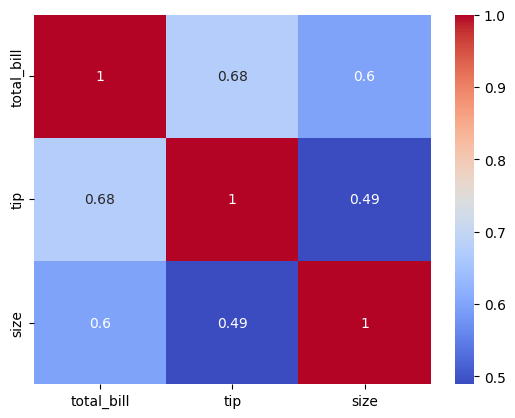

In [4]:
# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

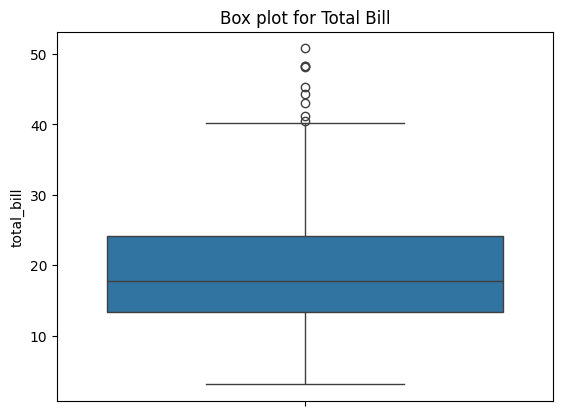

In [5]:
# Box plots
# Box plot for total bill
sns.boxplot(tips['total_bill'])
plt.title('Box plot for Total Bill')
plt.show()

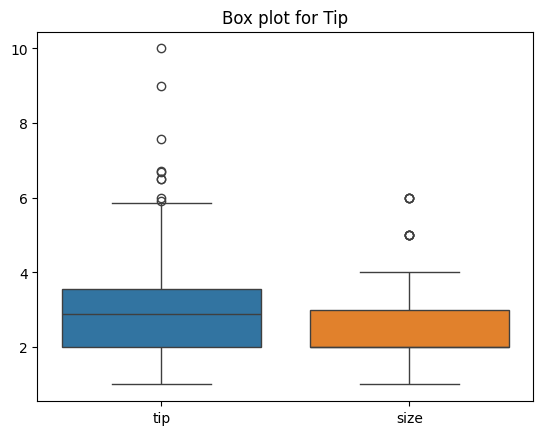

In [6]:
# Box plot for tips
sns.boxplot(tips[['tip','size']])
plt.title('Box plot for Tip')
plt.show()

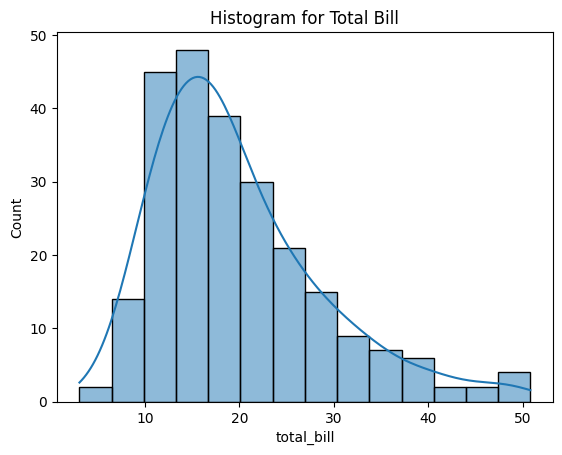

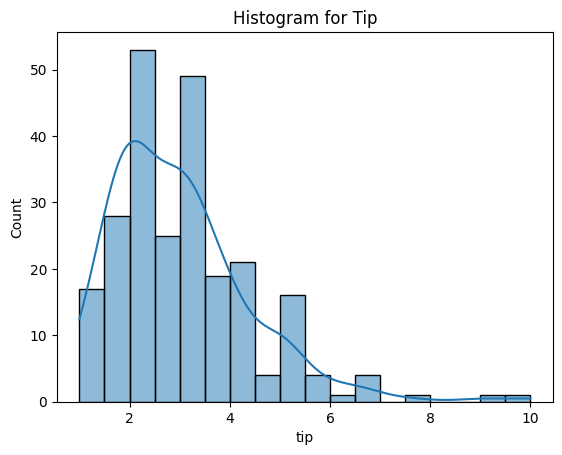

In [7]:
# Histograms
# Histogram for total bill
sns.histplot(tips['total_bill'], kde=True)
plt.title('Histogram for Total Bill')
plt.show()

# Histogram for tips
sns.histplot(tips['tip'], kde=True)
plt.title('Histogram for Tip')
plt.show()

# The term KDE stands for Kernel Density Estimation. 
# It is a way to estimate the probability density function (PDF) of a continuous variable. 
# In simple terms, it smooths out the histogram to represent the underlying distribution of the data.

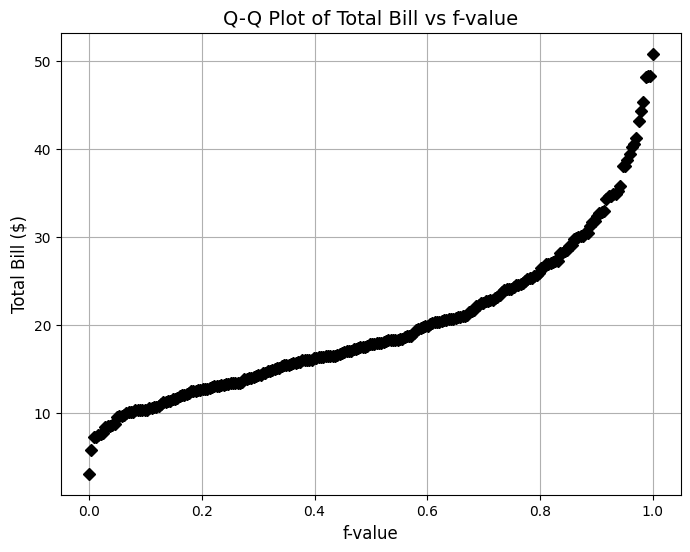

In [8]:
# Sort the 'total_bill' column and calculate the f-values
total_bill_sorted = np.sort(tips['total_bill'])
f_values = np.linspace(0, 1, len(total_bill_sorted))

# Create the Q-Q plot like the provided example (f-value vs total_bill)
plt.figure(figsize=(8, 6))
plt.plot(f_values, total_bill_sorted, marker='D', linestyle='none', color='black')
plt.xlabel('f-value', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.title('Q-Q Plot of Total Bill vs f-value', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()

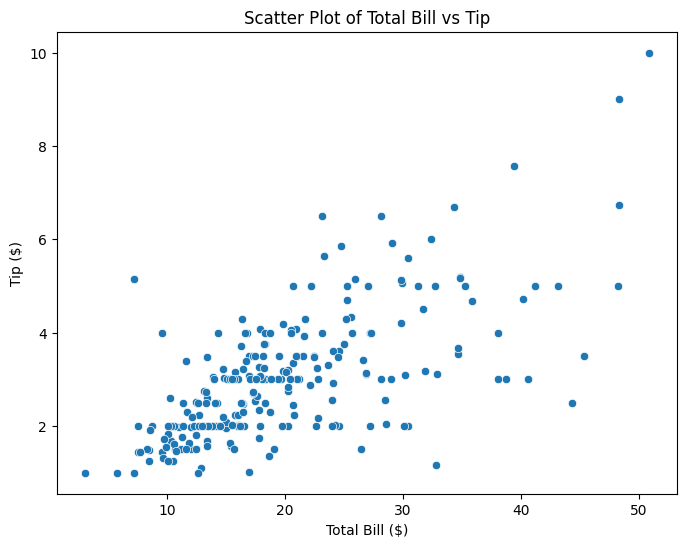

In [9]:
# Scatter plot of total bill vs tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)

# Add labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

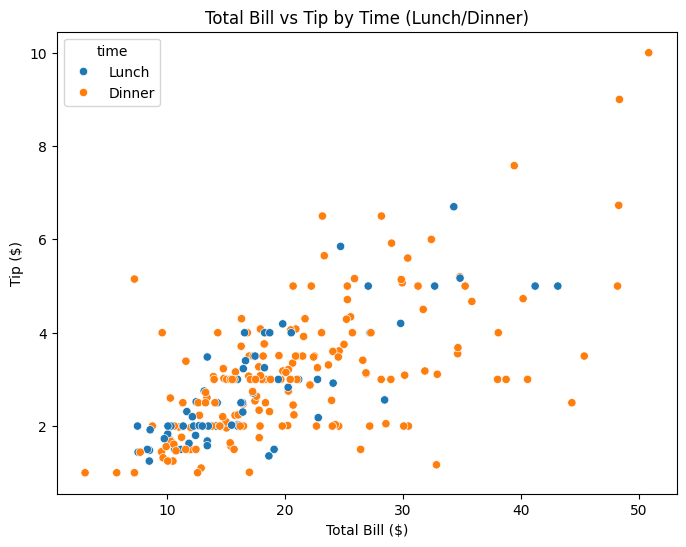

In [10]:
# Scatter plot with 'time' as the hue (color)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

# Add labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip by Time (Lunch/Dinner)')
plt.show()

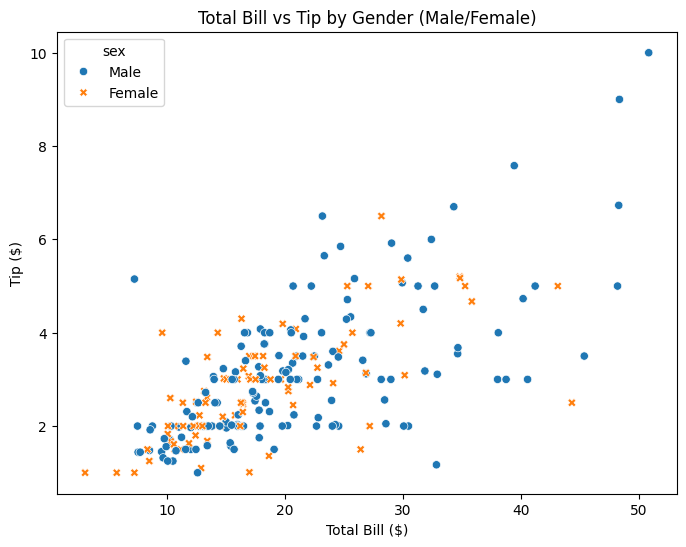

In [11]:
# Scatter plot separated by 'sex'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='sex', data=tips)

# Add labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip by Gender (Male/Female)')
plt.show()

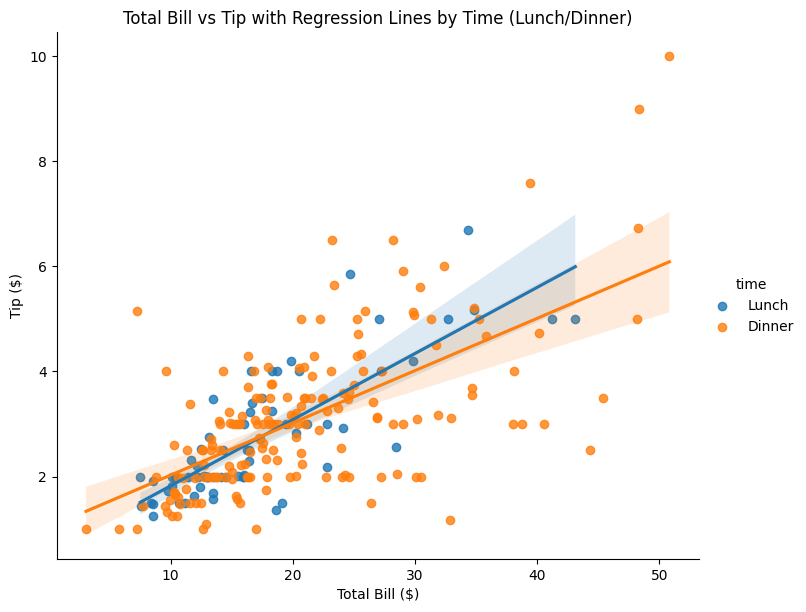

In [12]:
# Scatter plot with regression line separated by 'time'
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips, height=6, aspect=1.2)

# Add labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip with Regression Lines by Time (Lunch/Dinner)')
plt.show()

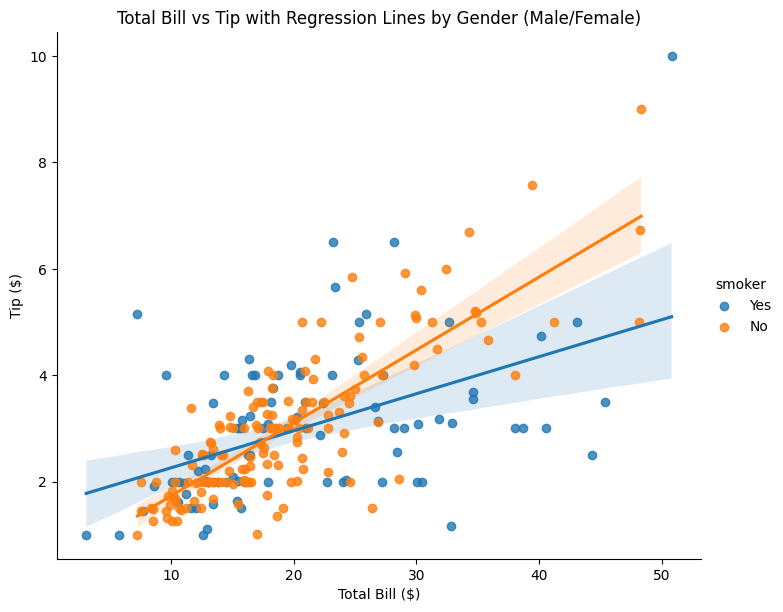

In [13]:
# Scatter plot with regression line separated by 'sex'
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, height=6, aspect=1.2)

# Add labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip with Regression Lines by Gender (Male/Female)')
plt.show()